In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import quandl

# set api key
quandl.ApiConfig.api_key = "sY8rR9LTz4kT5z2cs94v"

Our portfolio consists of four stocks of different sectors - UPL(Agrochemicals), DHP(Industrial machinery), NOCIL(Petrochemicals), ADANIPO(Marine ports adn Logistics)

In [3]:
start_date = pd.to_datetime('2014-04-01')
end_date = pd.to_datetime('2018-03-31')

In [36]:
upl = quandl.get('NSE/UPL.5',start_date=start_date,end_date=end_date)
dhp = quandl.get('BSE/BOM531306.5',start_date=start_date,end_date=end_date)
nocil = quandl.get('NSE/NOCIL.5',start_date=start_date,end_date=end_date)
adanipo = quandl.get('NSE/ADANIPORTS.5',start_date=start_date,end_date=end_date)

In [5]:
dhp.columns = ['Close']

In [6]:
portfolio = [upl,dhp,nocil,adanipo]
for stock in portfolio:
    stock['Normed Return'] = stock['Close']/stock.iloc[0]['Close']

My allocation :
    40% NOCIL ,
    20% UPL , 
    20% DHP , 
    20% ADANIPO

In [7]:
for stock,allo in zip(portfolio,[.2,.2,.4,.2]):
    stock['Allocation'] = stock['Normed Return']*allo

My investment = 30,000

In [8]:
for stock in portfolio:
    stock['Position'] = stock['Allocation']*30000

In [9]:
adanipo['Position'].head()

Date
2014-04-01    6000.000000
2014-04-02    5990.338164
2014-04-03    5838.969404
2014-04-04    5792.270531
2014-04-07    5700.483092
Name: Position, dtype: float64

In [10]:
portfolio_val = pd.concat([upl['Position'],dhp['Position'],nocil['Position'],adanipo['Position']],axis=1)
portfolio_val.columns = ['UPL Position','DHP Position','NOCIL Position','ADANI Posiiton']

In [11]:
portfolio_val.head()

,UPL Position,DHP Position,NOCIL Position,ADANI Posiiton
Date,,,,
2014-04-01,6000.000000,6000.000000,12000.000000,6000.000000
2014-04-02,6000.000000,6044.157119,12467.532468,5990.338164
2014-04-03,6250.583658,6214.242579,12584.415584,5838.969404
2014-04-04,6306.614786,6236.134526,13285.714286,5792.270531
2014-04-07,6297.276265,6407.834425,14025.974026,5700.483092


In [12]:
portfolio_val['Total Postition'] = portfolio_val.sum(axis=1)

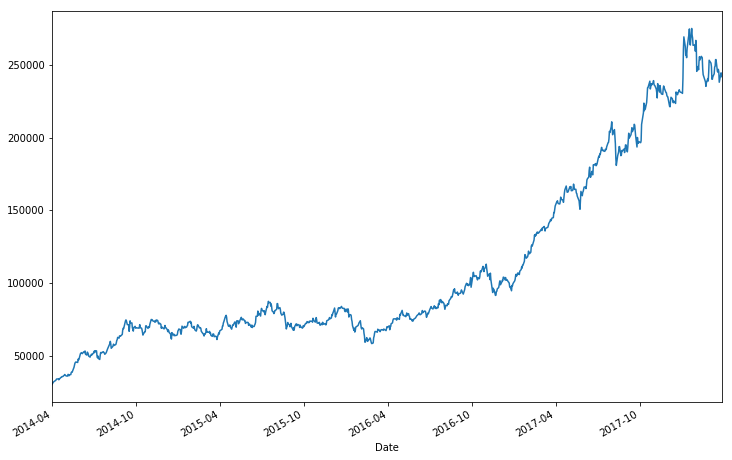

In [13]:
portfolio_val['Total Postition'].plot(figsize=(12,8))

In [14]:
portfolio_val.tail()

,UPL Position,DHP Position,NOCIL Position,ADANI Posiiton,Total Postition
Date,,,,,
2018-03-22,22315.953307,58884.039289,152922.077922,11537.842190,245659.912708
2018-03-23,21937.743191,57981.956969,146766.233766,11671.497585,238357.431511
2018-03-26,22549.416342,58857.058934,150389.610390,11760.064412,243556.150078
2018-03-27,22935.408560,59129.208606,151012.987013,11771.336554,244848.940733
2018-03-28,22731.517510,58604.851263,149493.506494,11404.186795,242234.062062


Lets check out our stats and then calculate the sharpe ratio with this allocation that is genius

In [23]:
portfolio_val['Daily Ret'] = portfolio_val['Total Postition'].pct_change(1)
portfolio_val['Daily Ret']

Date
2014-04-01         NaN
2014-04-02    0.016734
2014-04-03    0.012661
2014-04-04    0.023715
2014-04-07    0.025642
2014-04-09    0.009019
2014-04-10    0.015785
2014-04-11    0.016406
2014-04-15    0.002493
2014-04-16   -0.018301
2014-04-17    0.015645
2014-04-21    0.036975
2014-04-22   -0.000202
2014-04-23    0.013833
2014-04-25    0.001965
2014-04-28    0.026260
2014-04-29    0.011512
2014-04-30   -0.014609
2014-05-02   -0.013388
2014-05-05   -0.001945
2014-05-06    0.031990
2014-05-07   -0.001581
2014-05-08   -0.023633
2014-05-09    0.018592
2014-05-12    0.003704
2014-05-13    0.040412
2014-05-14    0.005517
2014-05-15   -0.001975
2014-05-16    0.024013
2014-05-19    0.062702
                ...   
2018-02-14   -0.003761
2018-02-15   -0.030650
2018-02-16   -0.015450
2018-02-19   -0.012118
2018-02-20   -0.004782
2018-02-21   -0.003802
2018-02-22   -0.012782
2018-02-23    0.009956
2018-02-26    0.012638
2018-02-27   -0.006916
2018-02-28    0.024635
2018-03-01    0.034398
2018-0

In [16]:
cum_ret = 100*(portfolio_val['Total Postition'][-1]/portfolio_val['Total Postition'][0]-1)
cum_ret

707.44687353844142

In [30]:
avg_daily_return = portfolio_val['Daily Ret'].mean()*252
avg_daily_return

0.5904691513059287

In [33]:
avg_std = portfolio_val['Daily Ret'].std()*252
avg_std

5.241908172344912

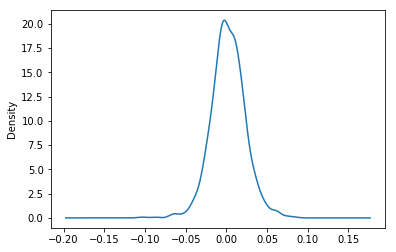

In [19]:
portfolio_val['Daily Ret'].plot(kind='kde')

In [34]:
rf_ind = 0.06
sharpe_ratio = (avg_daily_return-rf_ind)/avg_std
sharpe_ratio

0.10119771920167556

In [35]:
ASR = (252**0.5)*sharpe_ratio
ASR

1.6064639895274764

Hmmm, Will have to look into this, although our portfolio has grown a mammoth 700 percent, The sharpe ratio is negative! Could it 
be the volatility?

In [37]:
portfolio = pd.concat([upl,dhp,nocil,adanipo],axis=1)
portfolio.columns = ['UPL','DHP','NOCIL','ADANI']

In [38]:
portfolio.head()

,UPL,DHP,NOCIL,ADANI
Date,,,,
2014-04-01,192.75,51.148325,15.40,186.30
2014-04-02,192.75,51.524752,16.00,186.00
2014-04-03,200.80,52.974684,16.15,181.30
2014-04-04,202.60,53.161306,17.05,179.85
2014-04-07,202.30,54.625000,18.00,177.00


In [41]:
log_daily_returns = np.log(portfolio/portfolio.shift(1))
log_daily_returns

,UPL,DHP,NOCIL,ADANI
Date,,,,
2014-04-01,NaN,NaN,NaN,NaN
2014-04-02,0.000000,0.007333,0.038221,-0.001612
2014-04-03,0.040915,0.027752,0.009331,-0.025594
2014-04-04,0.008924,0.003517,0.054230,-0.008030
2014-04-07,-0.001482,0.027161,0.054222,-0.015973
2014-04-09,0.008858,0.028400,-0.011173,0.035792
2014-04-10,0.039861,0.016018,-0.011300,0.050748
2014-04-11,0.020504,0.016980,0.019691,0.003362
2014-04-15,0.019414,0.024084,0.000000,-0.034944


In [42]:
log_daily_returns.corr()

,UPL,DHP,NOCIL,ADANI
UPL,1.000000,0.139626,0.302836,0.267873
DHP,0.139626,1.000000,0.125484,0.152425
NOCIL,0.302836,0.125484,1.000000,0.332716
ADANI,0.267873,0.152425,0.332716,1.000000


In [46]:
log_daily_returns.cov()*252

,UPL,DHP,NOCIL,ADANI
UPL,0.125064,0.027254,0.053526,0.035299
DHP,0.027254,0.304649,0.034616,0.031349
NOCIL,0.053526,0.034616,0.249795,0.061963
ADANI,0.035299,0.031349,0.061963,0.138848


<function matplotlib.pyplot.tight_layout>

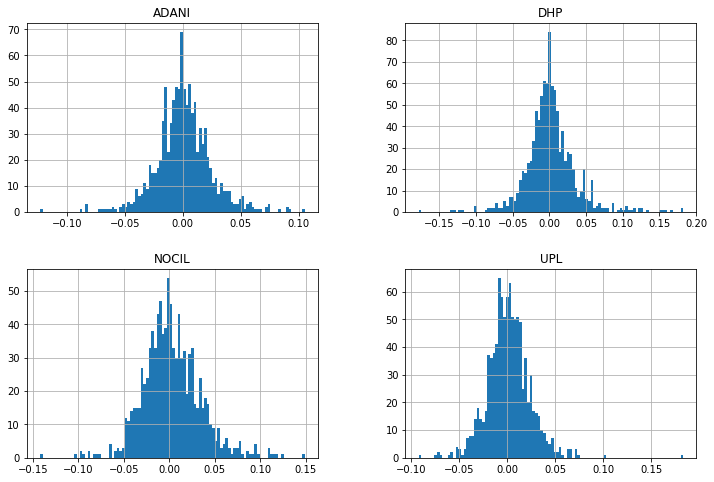

In [44]:
log_daily_returns.hist(bins=100,figsize=(12,8))
plt.tight_layout

In [45]:
log_daily_returns.mean()*252

UPL      0.341467
DHP      0.584255
NOCIL    0.646624
ADANI    0.164639
dtype: float64

Monte Carlo Simulation

In [48]:
num_ports = 20000

weights_arr = np.zeros((num_ports,len(portfolio.columns)))
ret_arr = np.zeros(num_ports)
vol_arr =np.zeros(num_ports)
sr_arr = np.zeros(num_ports)

for i in range(num_ports):
    weights = np.array(np.random.random(4))
    
    weights = weights/sum(weights)
    
    weights_arr[i,:] = weights
    ret_arr[i] = np.sum(log_daily_returns.mean()*weights)*252
    vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(log_daily_returns.cov()*252,weights)))
    sr_arr[i] = ret_arr[i]-0.06/vol_arr[i]

In [49]:
sr_arr.max()

0.50389479354530997

In [50]:
sr_arr.argmax()

4576

In [52]:
max_ret = ret_arr[4576]
max_vol = vol_arr[4576]
weights_arr[4576,:]

array([ 0.00356109,  0.11207007,  0.87996968,  0.00439916])

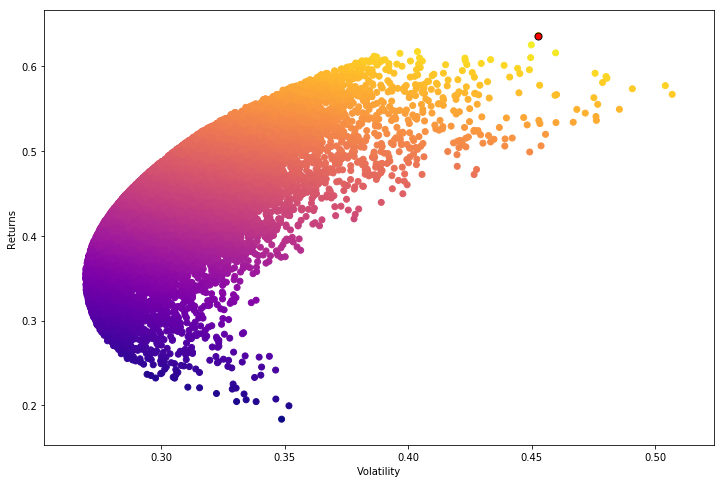

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sr_arr,cmap='plasma')
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.scatter(max_vol,max_ret,c='red',s=50,edgecolors='black')